In [13]:
import numpy as np
import damask
import matplotlib.pyplot as plt
import csv

### Importing the data

In [14]:
from pathlib import Path
path = Path()
file = path.joinpath('new2AL_cyclic_load_compression4.hdf5')
result = damask.Result(file)
result

Created by /usr/bin/DAMASK_grid v3.0.0-alpha7
        on 2023-11-16 08:35:46+0200
 executing "/usr/bin/DAMASK_grid --load /scratch/project_2008630/test/AA5754_DB/loads/cyclic_load_compression4.yaml --geom newAL.vti"

increment_0 (0.0 s)
  phase
    Aluminum
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        F_vM / 1: Mises equivalent strain of F (deformation gradient)
        IPFcolor_(1 0 0) / 8-bit RGB: Inverse Pole Figure (IPF) colors along sample direction (1 0 0)
        L_p / 1/s: plastic velocity gradient
        O / q_0 (q_1 q_2 q_3): crystal orientation as quaternion
        P / Pa: first Piola-Kirchhoff stress
        epsilon_U^0.0(F) / 1: strain tensor of F (deformation gradient)
        epsilon_U^0.0(F_p) / 1: strain tensor of F_p (plastic deformation gradient)
        epsilon_U^0.0(F_p)_vM / 1: Mises equivalent strain of epsilon_U^0.0(F_p) (strain tensor of F_p (plastic de

### Adding a bunch of culculations to the result

In [21]:
try:
    # Try to add the stress Cauchy if it's not in the result
    if 'sigma' not in result.get():
        result.add_stress_Cauchy()

    # Try to add the strain 'F' and 'F_p' if they're not in the result
    if 'F' not in result.get():
        result.add_strain('F', 'U')
    if 'F_p' not in result.get():
        result.add_strain('F_p', 'U')

    # Try to add the equivalent Mises 'sigma' and 'F' if they're not in the result
    if 'sigma_vM' not in result.get():
        result.add_equivalent_Mises('sigma')
    if 'F_vM' not in result.get():
        result.add_equivalent_Mises('F')

    # Try to add the strain and strain 'F_p' if they're not in the result
    if 'epsilon_V^0.0(F)' not in result.get():
        result.add_strain()
        result.add_strain('F_p')

    # Try to add the equivalent Mises 'epsilon_V^0.0(F)' and 'epsilon_U^0.0(F_p)' if they're not in the result
    if 'epsilon_V^0.0(F)_vM' not in result.get():
        result.add_equivalent_Mises('epsilon_V^0.0(F)')
    if 'epsilon_U^0.0(F_p)_vM' not in result.get():
        result.add_equivalent_Mises('epsilon_U^0.0(F_p)')

    # Try to add the IPF color if it's not in the result
    if 'IPFcolor_(1 0 0)' not in result.get():
        result.add_IPF_color(np.array([1,0,0]))
except:
    pass

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   0% ETA n/a

### Extracting the experimental data

In [22]:

from pathlib import Path
path = Path()
file = path.joinpath('AA5754-Ciclyc 2%_3mm.csv')
ex_epsilon = []
ex_sigma = []
with open(file) as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        epsilon_str = row[1]
        sigma_str = row[2]

        if epsilon_str and sigma_str:
            try:
                ex_epsilon.append(float(epsilon_str))
                ex_sigma.append(float(sigma_str))
            except ValueError:
                pass
new_ex_epsilon = []
for i in ex_epsilon:
    a = i/100
    new_ex_epsilon.append(a)

### Extracting the simulation data

In [23]:
new_sigma = [ ]
e_list = [ ]
for s in result.get(['P', 'F']).values():
    new_sigma.append(np.mean(s['P'])/3900000)
    e_list.append(np.mean(s['F'][:, 0, 0])-1)

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


### Plotting all cycles together

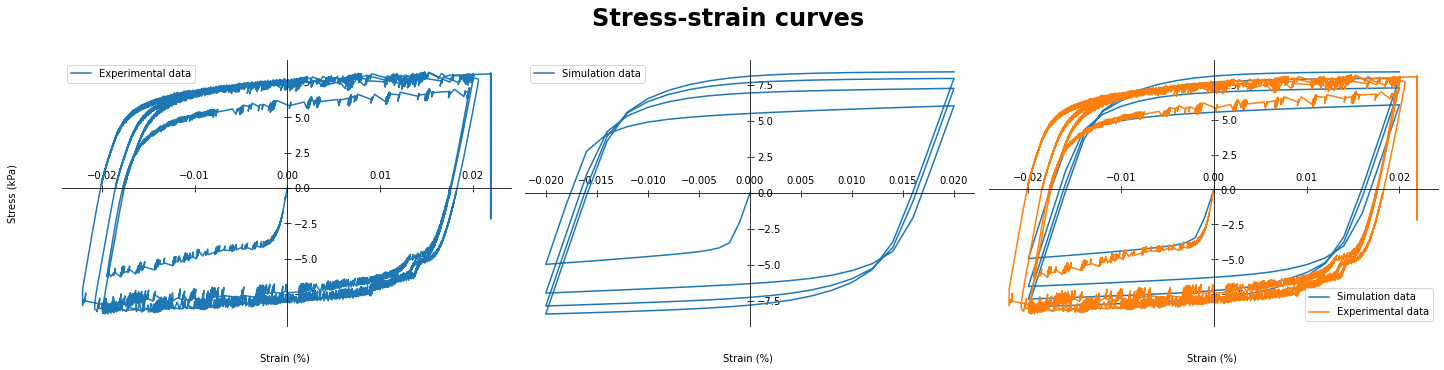

In [24]:

fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns

# Plotting the experimental data
axs[0].plot(new_ex_epsilon, ex_sigma, label = 'Experimental data')
axs[0].set_xlabel('Strain (%) ')
axs[0].set_ylabel('Stress (kPa)')
axs[0].legend()

# Plotting the simulation data
axs[1].plot(e_list, new_sigma, label = 'Simulation data')
axs[1].set_xlabel('Strain (%) ')
axs[1].legend()

# Plotting both the simulation data and experimental data together
axs[2].plot(e_list, new_sigma, label = 'Simulation data')
axs[2].plot(new_ex_epsilon, ex_sigma, label = 'Experimental data')
axs[2].set_xlabel('Strain (%) ')
axs[2].legend()

# Adjusting the position of the x and y axis
axs[0].spines['left'].set_position('zero')
axs[0].spines['left'].set_color('none')
axs[0].spines['right'].set_position(('data', 0))
axs[0].yaxis.tick_right()
axs[0].yaxis.set_ticks_position('both')

axs[1].spines['left'].set_position('zero')
axs[1].spines['left'].set_color('none')
axs[1].spines['right'].set_position(('data', 0))
axs[1].yaxis.tick_right()
axs[1].yaxis.set_ticks_position('both')

axs[2].spines['left'].set_position('zero')
axs[2].spines['left'].set_color('none')
axs[2].spines['right'].set_position(('data', 0))
axs[2].yaxis.tick_right()
axs[2].yaxis.set_ticks_position('both')

axs[0].spines['bottom'].set_position('zero')
axs[0].spines['bottom'].set_color('none')
axs[0].spines['top'].set_position(('data', 0))
axs[0].xaxis.tick_top()
axs[0].xaxis.set_ticks_position('both')

axs[1].spines['bottom'].set_position('zero')
axs[1].spines['bottom'].set_color('none')
axs[1].spines['top'].set_position(('data', 0))
axs[1].xaxis.tick_top()
axs[1].xaxis.set_ticks_position('both')

axs[2].spines['bottom'].set_position('zero')
axs[2].spines['bottom'].set_color('none')
axs[2].spines['top'].set_position(('data', 0))
axs[2].xaxis.tick_top()
axs[2].xaxis.set_ticks_position('both')

# Set the x and y axis labels for each subplot
axs[0].xaxis.set_label_coords(0.5, -0.1)
axs[0].yaxis.set_label_coords(-0.1, 0.5)
axs[1].xaxis.set_label_coords(0.5, -0.1)
axs[2].xaxis.set_label_coords(0.5, -0.1)
fig.suptitle('Stress-strain curves', fontsize=24, weight='bold', y=1.02)
# For each subplot, add the following line of code:
plt.tight_layout()
plt.show()

### Plotting each cycle separately

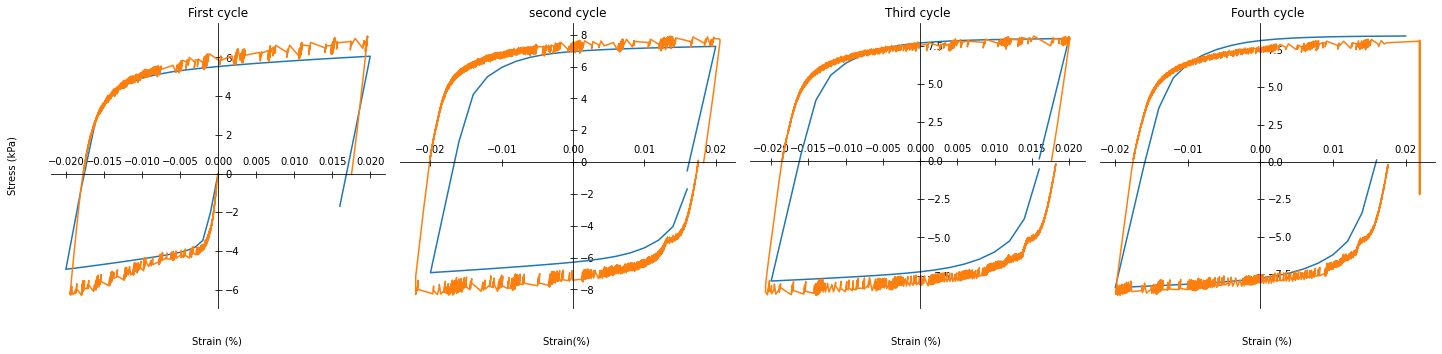

In [25]:

fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

# first cycle
axs[0].plot(e_list[0:43], new_sigma[0:43])
axs[0].plot(new_ex_epsilon[0:1753 ], ex_sigma[0: 1753])
axs[0].set_xlabel('Strain (%) ')
axs[0].set_ylabel('Stress (kPa)')
axs[0].set_title('First cycle')


# second cycle
axs[1].plot(e_list[42:83], new_sigma[42:83])
axs[1].plot(new_ex_epsilon[1754:1753 + 1960], ex_sigma[1754:1753 + 1960])
axs[1].set_xlabel('Strain(%) ')
axs[1].set_title('second cycle')


# third cycle
axs[2].plot(e_list[82:123], new_sigma[82:123])
axs[2].plot(new_ex_epsilon[1753 + 1961:1753 + 1960 + 1687], ex_sigma[1753 + 1961:1753 + 1960 + 1687])
axs[2].set_xlabel('Strain (%) ')
axs[2].set_title('Third cycle')


# fourth cycle
axs[3].plot(e_list[122:], new_sigma[122:])
axs[3].plot(new_ex_epsilon[1753 + 1960 + 1688: ], ex_sigma[1753 + 1960 + 1688: ])
axs[3].set_xlabel('Strain (%)')
axs[3].set_title('Fourth cycle')


# Adjusting the position of the x and y axis
axs[0].spines['left'].set_position('zero')
axs[0].spines['left'].set_color('none')
axs[0].spines['right'].set_position(('data', 0))
axs[0].yaxis.tick_right()
axs[0].yaxis.set_ticks_position('both')

axs[1].spines['left'].set_position('zero')
axs[1].spines['left'].set_color('none')
axs[1].spines['right'].set_position(('data', 0))
axs[1].yaxis.tick_right()
axs[1].yaxis.set_ticks_position('both')

axs[2].spines['left'].set_position('zero')
axs[2].spines['left'].set_color('none')
axs[2].spines['right'].set_position(('data', 0))
axs[2].yaxis.tick_right()
axs[2].yaxis.set_ticks_position('both')

axs[3].spines['left'].set_position('zero')
axs[3].spines['left'].set_color('none')
axs[3].spines['right'].set_position(('data', 0))
axs[3].yaxis.tick_right()
axs[3].yaxis.set_ticks_position('both')

# For each subplot, add the following lines of code:
axs[0].spines['bottom'].set_position('zero')
axs[0].spines['bottom'].set_color('none')
axs[0].spines['top'].set_position(('data', 0))
axs[0].xaxis.tick_top()
axs[0].xaxis.set_ticks_position('both')

axs[1].spines['bottom'].set_position('zero')
axs[1].spines['bottom'].set_color('none')
axs[1].spines['top'].set_position(('data', 0))
axs[1].xaxis.tick_top()
axs[1].xaxis.set_ticks_position('both')

axs[2].spines['bottom'].set_position('zero')
axs[2].spines['bottom'].set_color('none')
axs[2].spines['top'].set_position(('data', 0))
axs[2].xaxis.tick_top()
axs[2].xaxis.set_ticks_position('both')

axs[3].spines['bottom'].set_position('zero')
axs[3].spines['bottom'].set_color('none')
axs[3].spines['top'].set_position(('data', 0))
axs[3].xaxis.tick_top()
axs[3].xaxis.set_ticks_position('both')

# Set the x and y axis labels position for each subplot
axs[0].xaxis.set_label_coords(0.5, -0.1)
axs[0].yaxis.set_label_coords(-0.1, 0.5)
axs[1].xaxis.set_label_coords(0.5, -0.1)
axs[2].xaxis.set_label_coords(0.5, -0.1)
axs[3].xaxis.set_label_coords(0.5, -0.1)
axs[3].yaxis.set_label_coords(0.5, -0.1)


plt.tight_layout()
plt.show()

### Exporting the data into a VTK file for further visualization using Paraview software

In [ ]:
result.export_VTK(parallel=False)